# Project VI - Solution of Initial Value Problems

In [1]:
# All libraries will be imported in this cell
import numpy as np
import matplotlib.pyplot as plt

from tabulate import tabulate as table

Consider the initial-value-problem:

$$
\begin{align*}
x^{''}(t)+2\gamma x^{'}+\omega^{2} x(t)=0 \\
x(0)=x_0 \\ 
x^{'}(0)=\gamma x_0
\end{align*}
$$

with $0 < \gamma < \omega$. It's solution is given by
$$x(t)=x_0 e^{-\gamma t} \cos(\beta t)$$

where $\beta = \sqrt{\omega^{2}-\gamma^{2}}$. This equation can be written as a first order system, with $x^{'}=y$, and $y^{'}=-2\gamma y - \omega^2 x$.

In [2]:
def x(t, g, B, x0):
    return x0 * np.exp(-g * t) * np.cos(B * t)

In [3]:
def f(x, y, g ,o):
    return (-2 * g * x) - (o**2) * y

## Your task

### Explicit Midpoint

Implement the Explicit Midpoint method (EMP) doing
$$\frac{x_{n+1}−x_{n−1}}{2h}=y_n\\
\frac{y_{n+1}−y_{n−1}}{2h}=−2\gamma y_n− \omega^2x_n $$

In [4]:
def eulers(t, x, xp_0, g, o, h):
    return xp_0 + h * f(t, x, g, o)

In [5]:
def mid_point(t, IV):
    t_0, x_0, xp_0, steps, g, o = IV
    h = (t - t_0) / steps
    
    y = np.zeros(steps+1)
    t = np.arange(t_0, t + h, h)
    
    y[0] = eulers(t_0, x_0, xp_0, g, o, h)
    
    for i in range(1, steps):
        y[i+1] = y[i-1] + 2 * f(t[i], y[i], g, o) * h
        
    return t, y

### Implicit Midpoint

Implement the Implicit Midpoint method (IMP) doing
$$ \frac{x_{n+1}−x_n}{h}=\frac{y_{n+1}+y_n}{2}\\
\frac{y_{n+1}−y_n}{h}=−2\gamma \frac{y_{n+1}+y_n}{2}−\omega^2\frac{x_{n+1}+x_n}{2}$$

In [6]:
def implicit_mid_point(t, IV):
    
    t_0, x_0, xp_0, steps, g, o = IV
    h = (t - t_0) / steps
    
    y = np.zeros(steps + 1)
    t = np.arange(t_0, t + h, h)
    
    y[0] = xp_0
    
    for i in range(1, (steps+1)):
        k = f(t[i-1], y[i-1], g, o)
        y[i] = y[i-1] + f(t[i-1] + (.5 * h), y[i-1] + (.5 * h * k), g, o) * h
        
    return t, y

### Non-Standard Implicit Midpoint

Implement the Non-Standard Implicit Midpoint method (NSIMP) doing
$$\frac{x_{n+1}−e^{−\gamma h}x_n}{h}=\frac{y_{n+1}+e^{−\gamma h}y_n}{2}\\
\frac{y_{n+1}−e^{−\gamma h}y_n}{h}=−\omega^2\frac{x_{n+1}+e^{−\gamma h}x_n}{2}$$

 - All three methods are second order and they do not differ much in terms of computational cost; demonstrate this numerically.  I expect several table with the results.

 - For $\gamma=0$  the  implicit  methods  are  equivalent,  and  we  expect  they  are  superior  to  the explicit method; check this numerically using long time simulations with varioush, $\omega$, $x_0$.

- Experiment on the long-time accuracy of the methods for small values of $\gamma>0$.

- Run experiments to help you fully understand what happens to the approximations as $\gamma$ increases.

- If there is, in fact, a ’breaking point’ for any method as $\gamma$ increases determine what it is and how it depends upon $h$ or $\omega$.

In [7]:
def exact(t, IV):
    t_0, x_0, xp_0, steps, g, o = IV
    h = (t - t_0) / steps
    
    y = np.zeros(steps + 1)
    t = np.arange(t_0, t + h, h)
    B = np.sqrt((o**2) - (g**2))
    
    for i in range(0, (steps+1)):
        y[i] = x_0 * np.exp(-g * t[i]) * np.cos(B * t[i])
        
    return t, y

In [8]:
def relative_error(exact, aprox, steps):
    rel_error = np.zeros(steps+1)
    
    for i in range(0, steps + 1):
        rel_error[i] = np.abs(exact[i]-aprox[i]) / np.abs(exact[i])
        
    return rel_error

In [9]:
def results(t, y_mid, y_imp, y_exact):
    return list(zip(range(y_mid.shape[0]), t, y_mid, y_imp, y_exact))

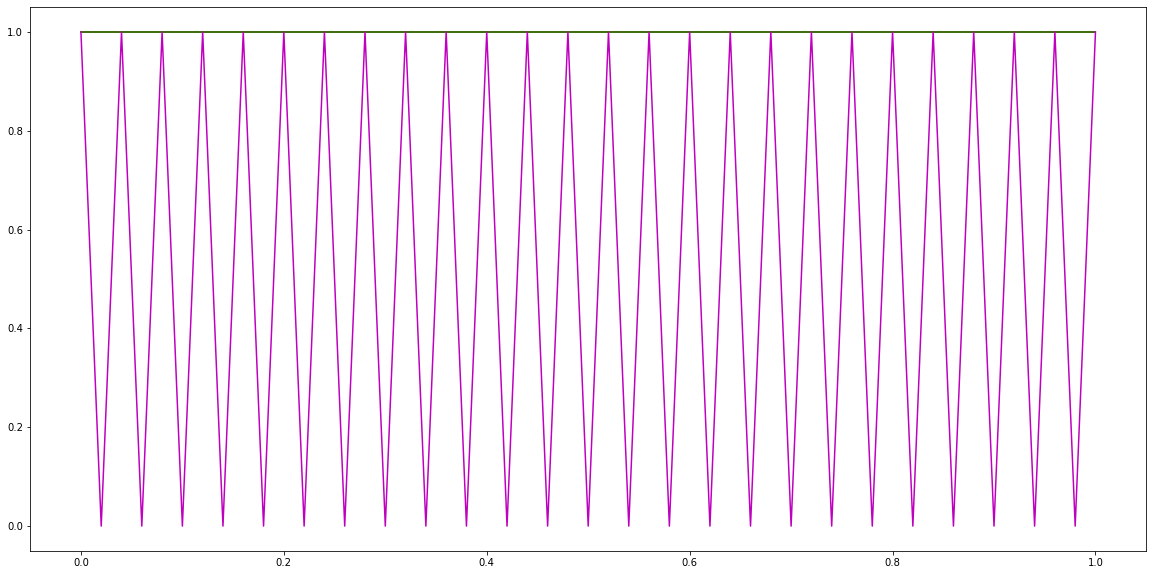

In [43]:
# IV = (t_0, x_0, xp_0, steps, gamma, omega)
# t = [0, 1]

initial_value = (0, 1, 1, 50, 0.000001, 0.0001)

t_mid, y_mid = mid_point(1, initial_value)
t_imp, y_imp = implicit_mid_point(1, initial_value)
t_exact, y_exact = exact(1, initial_value)

plt.figure(figsize=(20,10))
plt.plot(t_exact, y_exact, "r")
plt.plot(t_imp, y_imp, "g")
plt.plot(t_mid, y_mid, "m")

plt.show()

In [11]:
table_results = results(t_mid, y_mid, y_imp, y_exact)
print(table(table_results, headers=["n", "t", "y_mid", "y_imp", "y_exact"]))

  n     t        y_mid     y_imp    y_exact
---  ----  -----------  --------  ---------
  0  0      0.995       1          1
  1  0.02   0           0.995008   0.99975
  2  0.04   0.994984    0.990034   0.9994
  3  0.06  -0.00998184  0.985076   0.998951
  4  0.08   0.995036    0.980135   0.998401
  5  0.1   -0.0199962   0.975211   0.997753
  6  0.12   0.995156    0.970303   0.997004
  7  0.14  -0.0300438   0.965412   0.996156
  8  0.16   0.995344    0.960537   0.995209
  9  0.18  -0.0401252   0.955678   0.994163
 10  0.2    0.995601    0.950836   0.993018
 11  0.22  -0.0502412   0.94601    0.991774
 12  0.24   0.995928    0.9412     0.990432
 13  0.26  -0.0603925   0.936406   0.988991
 14  0.28   0.996324    0.931628   0.987451
 15  0.3   -0.0705797   0.926866   0.985814
 16  0.32   0.99679     0.922119   0.984078
 17  0.34  -0.0808036   0.917389   0.982245
 18  0.36   0.997326    0.912673   0.980315
 19  0.38  -0.0910649   0.907974   0.978287
 20  0.4    0.997932    0.90329    0.97616

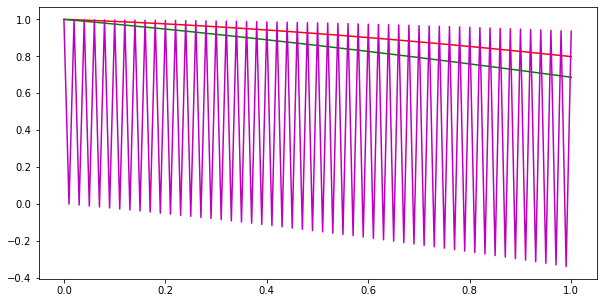

In [12]:
# IV = (t_0, x_0, xp_0, steps, gamma, omega)
initial_value = (0, 1, 1, 100, .1, .5)

t_mid, y_mid = mid_point(1, initial_value)
t_imp, y_imp = implicit_mid_point(1, initial_value)
t_exact, y_exact = exact(1, initial_value)

plt.figure(figsize=(10,5))
plt.plot(t_exact, y_exact, "r")
plt.plot(t_imp, y_imp, "g")
plt.plot(t_mid, y_mid, "m")

plt.show()

In [13]:
table_results = results(t_mid, y_mid, y_imp, y_exact)
print(table(table_results, headers=["n", "t", "y_mid", "y_imp", "y_exact"]))

  n     t       y_mid     y_imp    y_exact
---  ----  ----------  --------  ---------
  0  0      0.9975     1          1
  1  0.01   0          0.997493   0.998989
  2  0.02   0.99746    0.994973   0.997954
  3  0.03  -0.0050673  0.992438   0.996897
  4  0.04   0.997365   0.98989    0.995817
  5  0.05  -0.0102141  0.987329   0.994714
  6  0.06   0.997216   0.984754   0.993589
  7  0.07  -0.0154402  0.982165   0.992441
  8  0.08   0.997014   0.979563   0.99127
  9  0.09  -0.0207453  0.976947   0.990077
 10  0.1    0.996757   0.974318   0.988862
 11  0.11  -0.0261291  0.971676   0.987625
 12  0.12   0.996448   0.96902    0.986365
 13  0.13  -0.0315913  0.966351   0.985083
 14  0.14   0.996086   0.963668   0.983779
 15  0.15  -0.0371317  0.960972   0.982453
 16  0.16   0.995672   0.958263   0.981106
 17  0.17  -0.0427501  0.955541   0.979736
 18  0.18   0.995205   0.952805   0.978345
 19  0.19  -0.0484461  0.950057   0.976932
 20  0.2    0.994688   0.947295   0.975497
 21  0.21  -0.05421

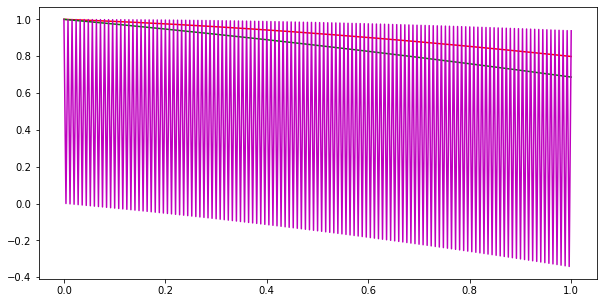

In [14]:
# IV = (t_0, x_0, xp_0, steps, gamma, omega)
initial_value = (0, 1, 1, 250, .1, .5)

t_mid, y_mid = mid_point(1, initial_value)
t_imp, y_imp = implicit_mid_point(1, initial_value)
t_exact, y_exact = exact(1, initial_value)

plt.figure(figsize=(10,5))
plt.plot(t_exact, y_exact, "r")
plt.plot(t_imp, y_imp, "g")
plt.plot(t_mid, y_mid, "m")

plt.show()

In [15]:
table_results = results(t_mid, y_mid, y_imp, y_exact)
print(table(table_results, headers=["n", "t", "y_mid", "y_imp", "y_exact"]))

  n      t        y_mid     y_imp    y_exact
---  -----  -----------  --------  ---------
  0  0       0.999       1          1
  1  0.004   0           0.998999   0.999598
  2  0.008   0.998994    0.997996   0.999193
  3  0.012  -0.00201079  0.99699    0.998783
  4  0.016   0.998978    0.995982   0.998371
  5  0.02   -0.00403434  0.994973   0.997954
  6  0.024   0.998954    0.99396    0.997534
  7  0.028  -0.00607065  0.992946   0.99711
  8  0.032   0.998922    0.99193    0.996683
  9  0.036  -0.0081197   0.990911   0.996252
 10  0.04    0.99888     0.98989    0.995817
 11  0.044  -0.0101815   0.988867   0.995378
 12  0.048   0.99883     0.987842   0.994936
 13  0.052  -0.0122559   0.986815   0.994491
 14  0.056   0.998772    0.985785   0.994041
 15  0.06   -0.0143431   0.984754   0.993589
 16  0.064   0.998704    0.98372    0.993132
 17  0.068  -0.0164429   0.982684   0.992672
 18  0.072   0.998629    0.981646   0.992208
 19  0.076  -0.0185553   0.980605   0.991741
 20  0.08    0.998

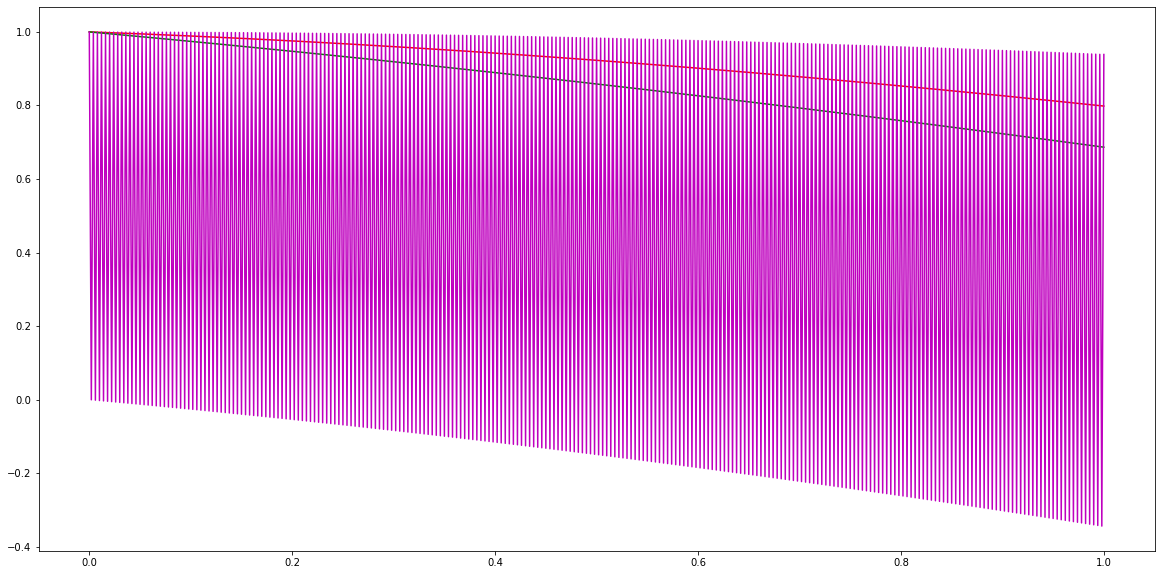

In [16]:
# IV = (t_0, x_0, xp_0, steps, gamma, omega)
initial_value = (0, 1, 1, 500, .1, .5)

t_mid, y_mid = mid_point(1, initial_value)
t_imp, y_imp = implicit_mid_point(1, initial_value)
t_exact, y_exact = exact(1, initial_value)

plt.figure(figsize=(20,10))
plt.plot(t_exact, y_exact, "r")
plt.plot(t_imp, y_imp, "g")
plt.plot(t_mid, y_mid, "m")

plt.show()

In [17]:
table_results = results(t_mid, y_mid, y_imp, y_exact)
print(table(table_results, headers=["n", "t", "y_mid", "y_imp", "y_exact"]))

  n      t        y_mid     y_imp    y_exact
---  -----  -----------  --------  ---------
  0  0       0.9995      1          1
  1  0.002   0           0.9995     0.9998
  2  0.004   0.999498    0.998999   0.999598
  3  0.006  -0.0010027   0.998498   0.999396
  4  0.008   0.999495    0.997996   0.999193
  5  0.01   -0.00200859  0.997493   0.998989
  6  0.012   0.999489    0.99699    0.998783
  7  0.014  -0.00301768  0.996487   0.998577
  8  0.016   0.99948     0.995982   0.998371
  9  0.018  -0.00402996  0.995478   0.998163
 10  0.02    0.99947     0.994973   0.997954
 11  0.022  -0.00504543  0.994467   0.997744
 12  0.024   0.999458    0.99396    0.997534
 13  0.026  -0.00606409  0.993454   0.997322
 14  0.028   0.999443    0.992946   0.99711
 15  0.03   -0.00708593  0.992438   0.996897
 16  0.032   0.999426    0.99193    0.996683
 17  0.034  -0.00811096  0.991421   0.996468
 18  0.036   0.999407    0.990911   0.996252
 19  0.038  -0.00913916  0.990401   0.996035
 20  0.04    0.99938

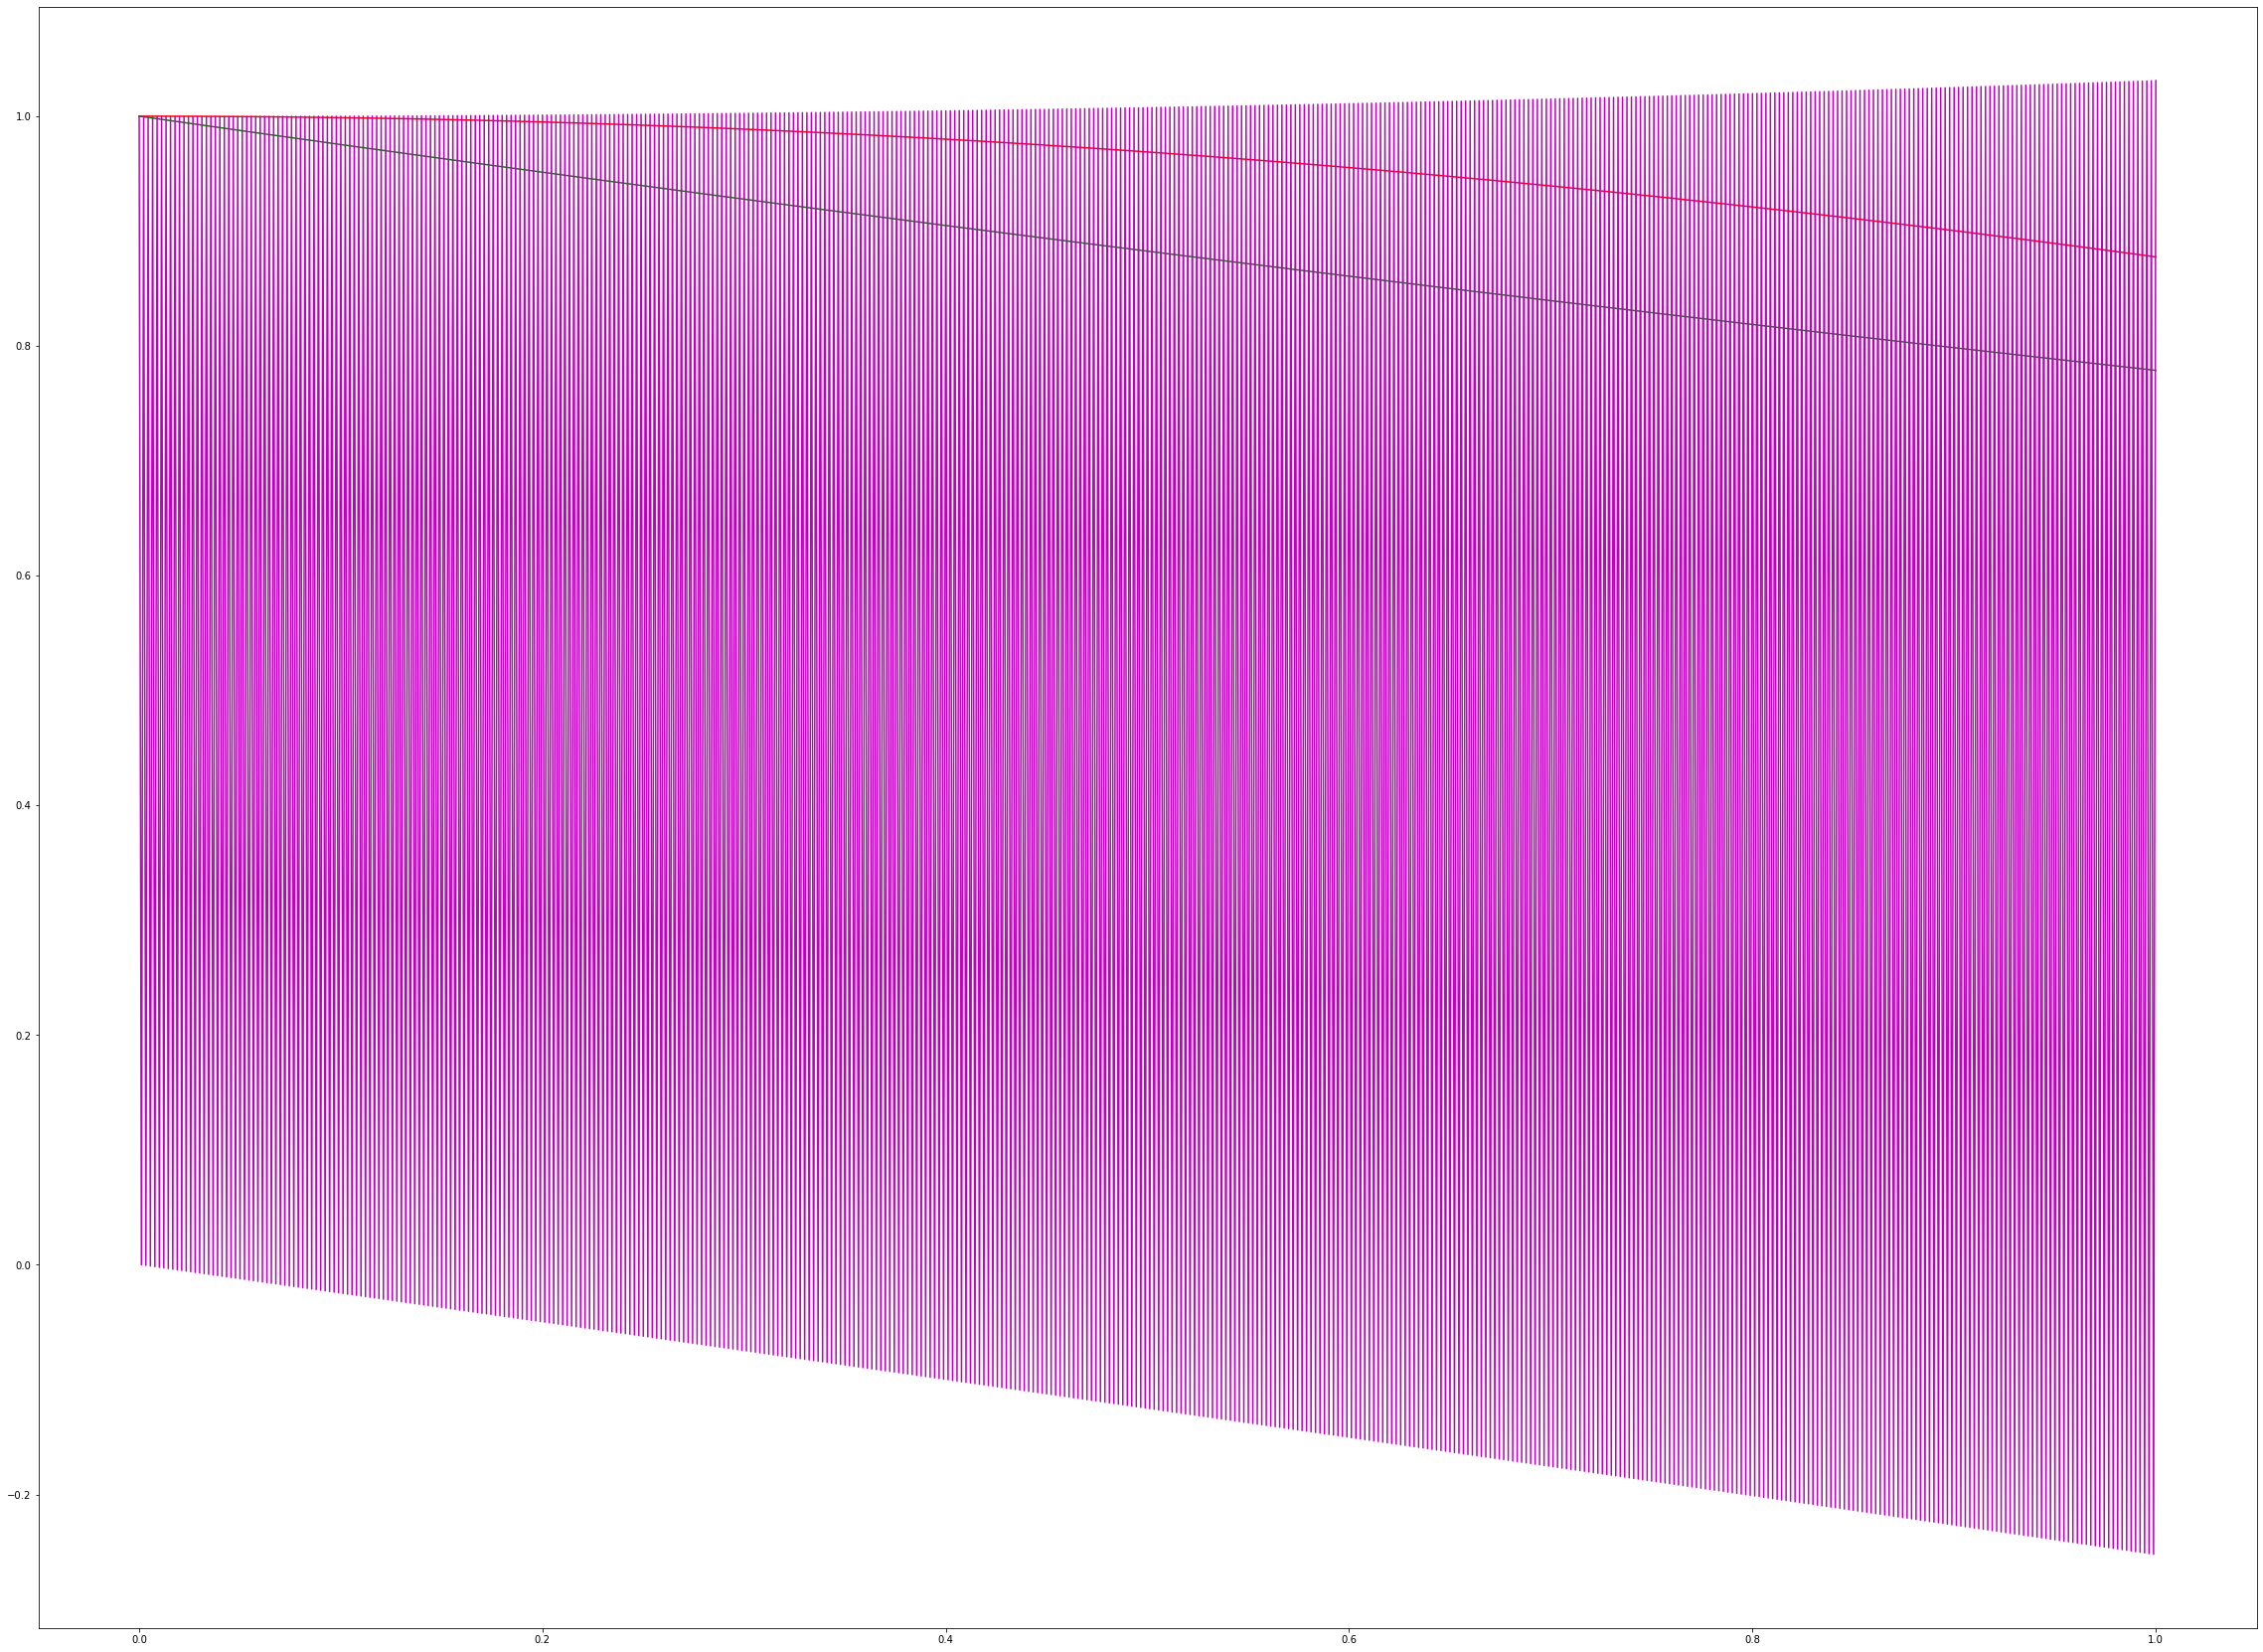

In [36]:
# IV = (t_0, x_0, xp_0, steps, gamma, omega)
initial_value = (0, 1, 1, 900, .0001, 0.5)

t_mid, y_mid = mid_point(1, initial_value)
t_imp, y_imp = implicit_mid_point(1, initial_value)
t_exact, y_exact = exact(1, initial_value)

plt.figure(figsize=(40,30))
plt.plot(t_exact, y_exact, "r")
plt.plot(t_imp, y_imp, "g")
plt.plot(t_mid, y_mid, "m")

plt.show()

In [19]:
table_results = results(t_mid, y_mid, y_imp, y_exact)
print(table(table_results, headers=["n", "t", "y_mid", "y_imp", "y_exact"]))

    n        t         y_mid     y_imp    y_exact
-----  -------  ------------  --------  ---------
    0  0         0.999995     1          1
    1  2e-05     0            0.999995   0.999998
    2  4e-05     0.999995     0.99999    0.999996
    3  6e-05    -1.00003e-05  0.999985   0.999994
    4  8e-05     0.999995     0.99998    0.999992
    5  0.0001   -2.00009e-05  0.999975   0.99999
    6  0.00012   0.999995     0.99997    0.999988
    7  0.00014  -3.00018e-05  0.999965   0.999986
    8  0.00016   0.999995     0.99996    0.999984
    9  0.00018  -4.0003e-05   0.999955   0.999982
   10  0.0002    0.999995     0.99995    0.99998
   11  0.00022  -5.00045e-05  0.999945   0.999978
   12  0.00024   0.999995     0.99994    0.999976
   13  0.00026  -6.00064e-05  0.999935   0.999974
   14  0.00028   0.999995     0.99993    0.999972
   15  0.0003   -7.00086e-05  0.999925   0.99997
   16  0.00032   0.999995     0.99992    0.999968
   17  0.00034  -8.00111e-05  0.999915   0.999966
   18  0.0